Challenge 2 Customer Churn 

1.   Nisa Hayuningrum
2.   Nisrina Rafifa H




# Import Library


In [ ]:
# import library
import pandas as pd # untuk membaca dan memanipulasi data dalam format DataFrame
import numpy as np #untuk melakukan operasi numerik pada data
import matplotlib.pyplot as plt 
import seaborn as sns #untuk membuat visualisasi data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score #ntuk melakukan pemodelan dan evaluasi pada data

In [ ]:
# membaca dataset
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

# EDA (Exploratory Data Analysis)

##Melihat Informasi Umum Data

In [ ]:
# melihat informasi umum dataset test
test_data.info()

# melihat informasi umum dataset train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

## Melihat Statistik Deskriptif

In [ ]:
# melihat statistik deskriptif dataset test
test_data.describe()

# melihat statistik deskriptif dataset train
train_data.describe()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Melihat Distribusi Data

array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'total_day_calls'}>],
       [<Axes: title={'center': 'total_day_charge'}>,
        <Axes: title={'center': 'total_eve_minutes'}>,
        <Axes: title={'center': 'total_eve_calls'}>,
        <Axes: title={'center': 'total_eve_charge'}>],
       [<Axes: title={'center': 'total_night_minutes'}>,
        <Axes: title={'center': 'total_night_calls'}>,
        <Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_minutes'}>],
       [<Axes: title={'center': 'total_intl_calls'}>,
        <Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>,
        <Axes: >]], dtype=object)

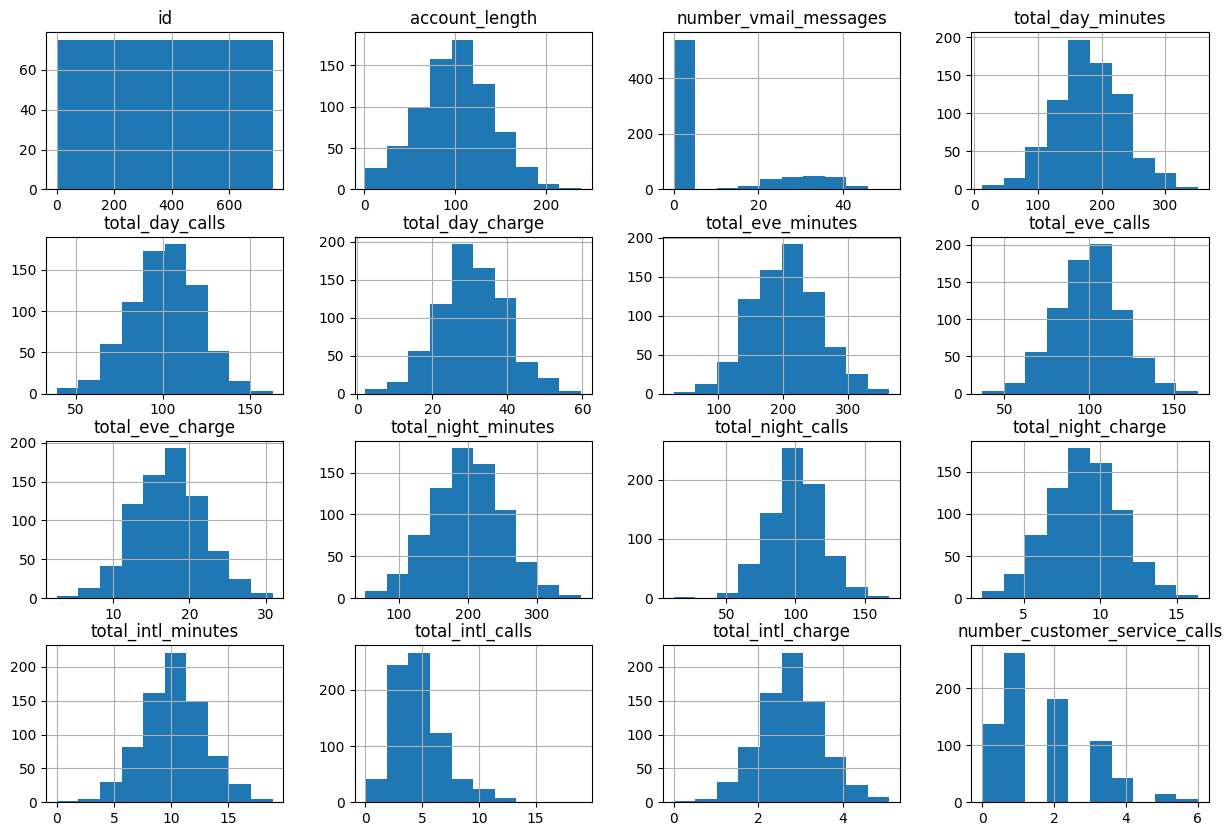

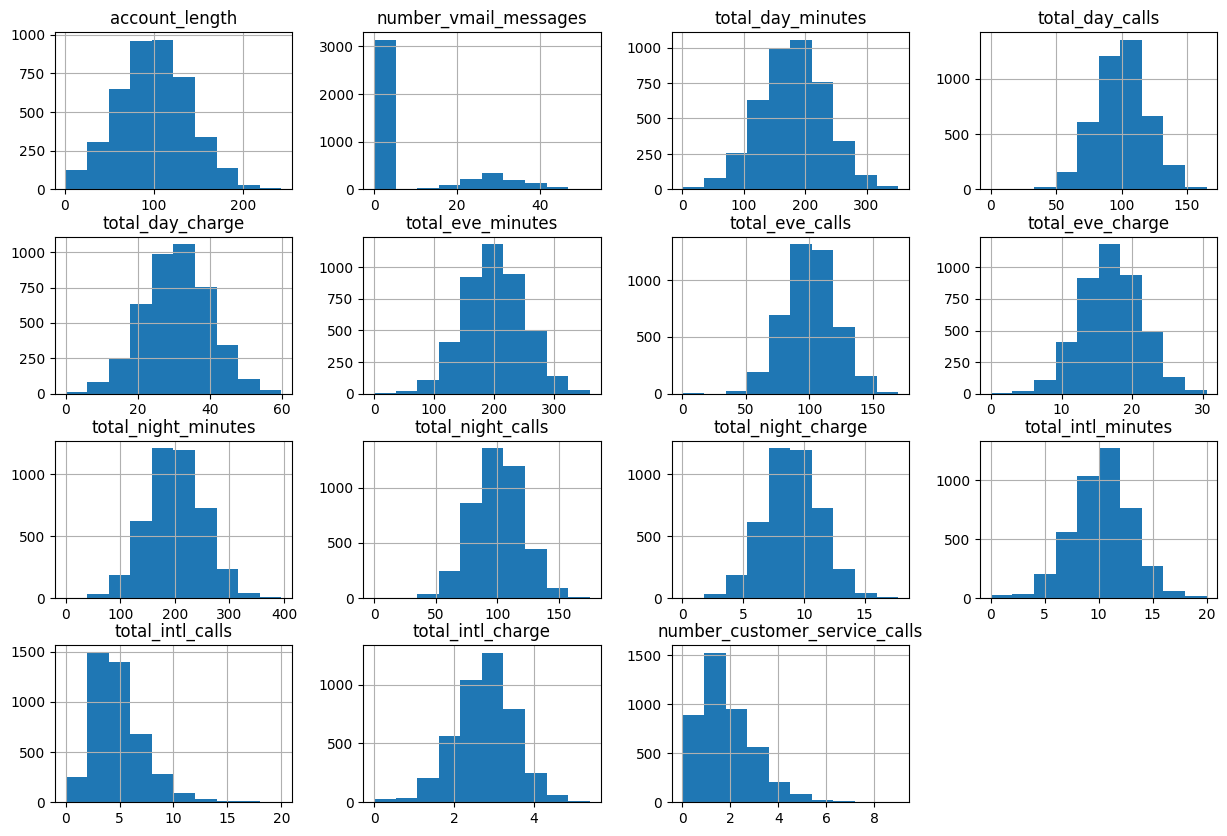

In [ ]:
# melihat distribusi data pada dataset test
test_data.hist(figsize=(15,10))

# melihat distribusi data pada dataset train
train_data.hist(figsize=(15,10))


not_churned:  3652 , churned:  598


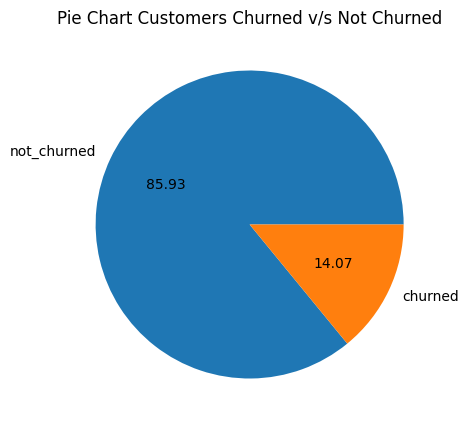

In [ ]:
# Checking Imbalance in Data
not_churned = train_data[train_data['churn']=='no']['churn'].count()
churned = train_data[train_data['churn']=='yes']['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned v/s Not Churned')
plt.show()

<ipython-input-5-0021ad68302b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ac_len_churned,label='Churned')
<ipython-input-5-0021ad68302b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ac_len_not_churned,label='Not_churned')


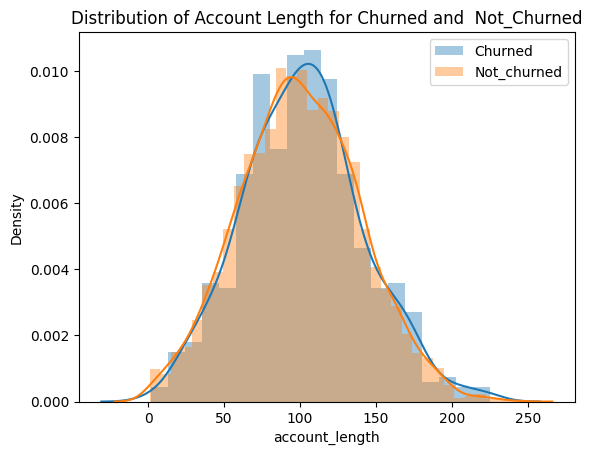

In [ ]:
ac_len_churned = train_data[train_data['churn']=='yes']['account_length']
ac_len_not_churned = train_data[train_data['churn']=='no']['account_length']
sns.distplot(ac_len_churned,label='Churned')
sns.distplot(ac_len_not_churned,label='Not_churned')
plt.title('Distribution of Account Length for Churned and  Not_Churned')
plt.legend()
plt.show()

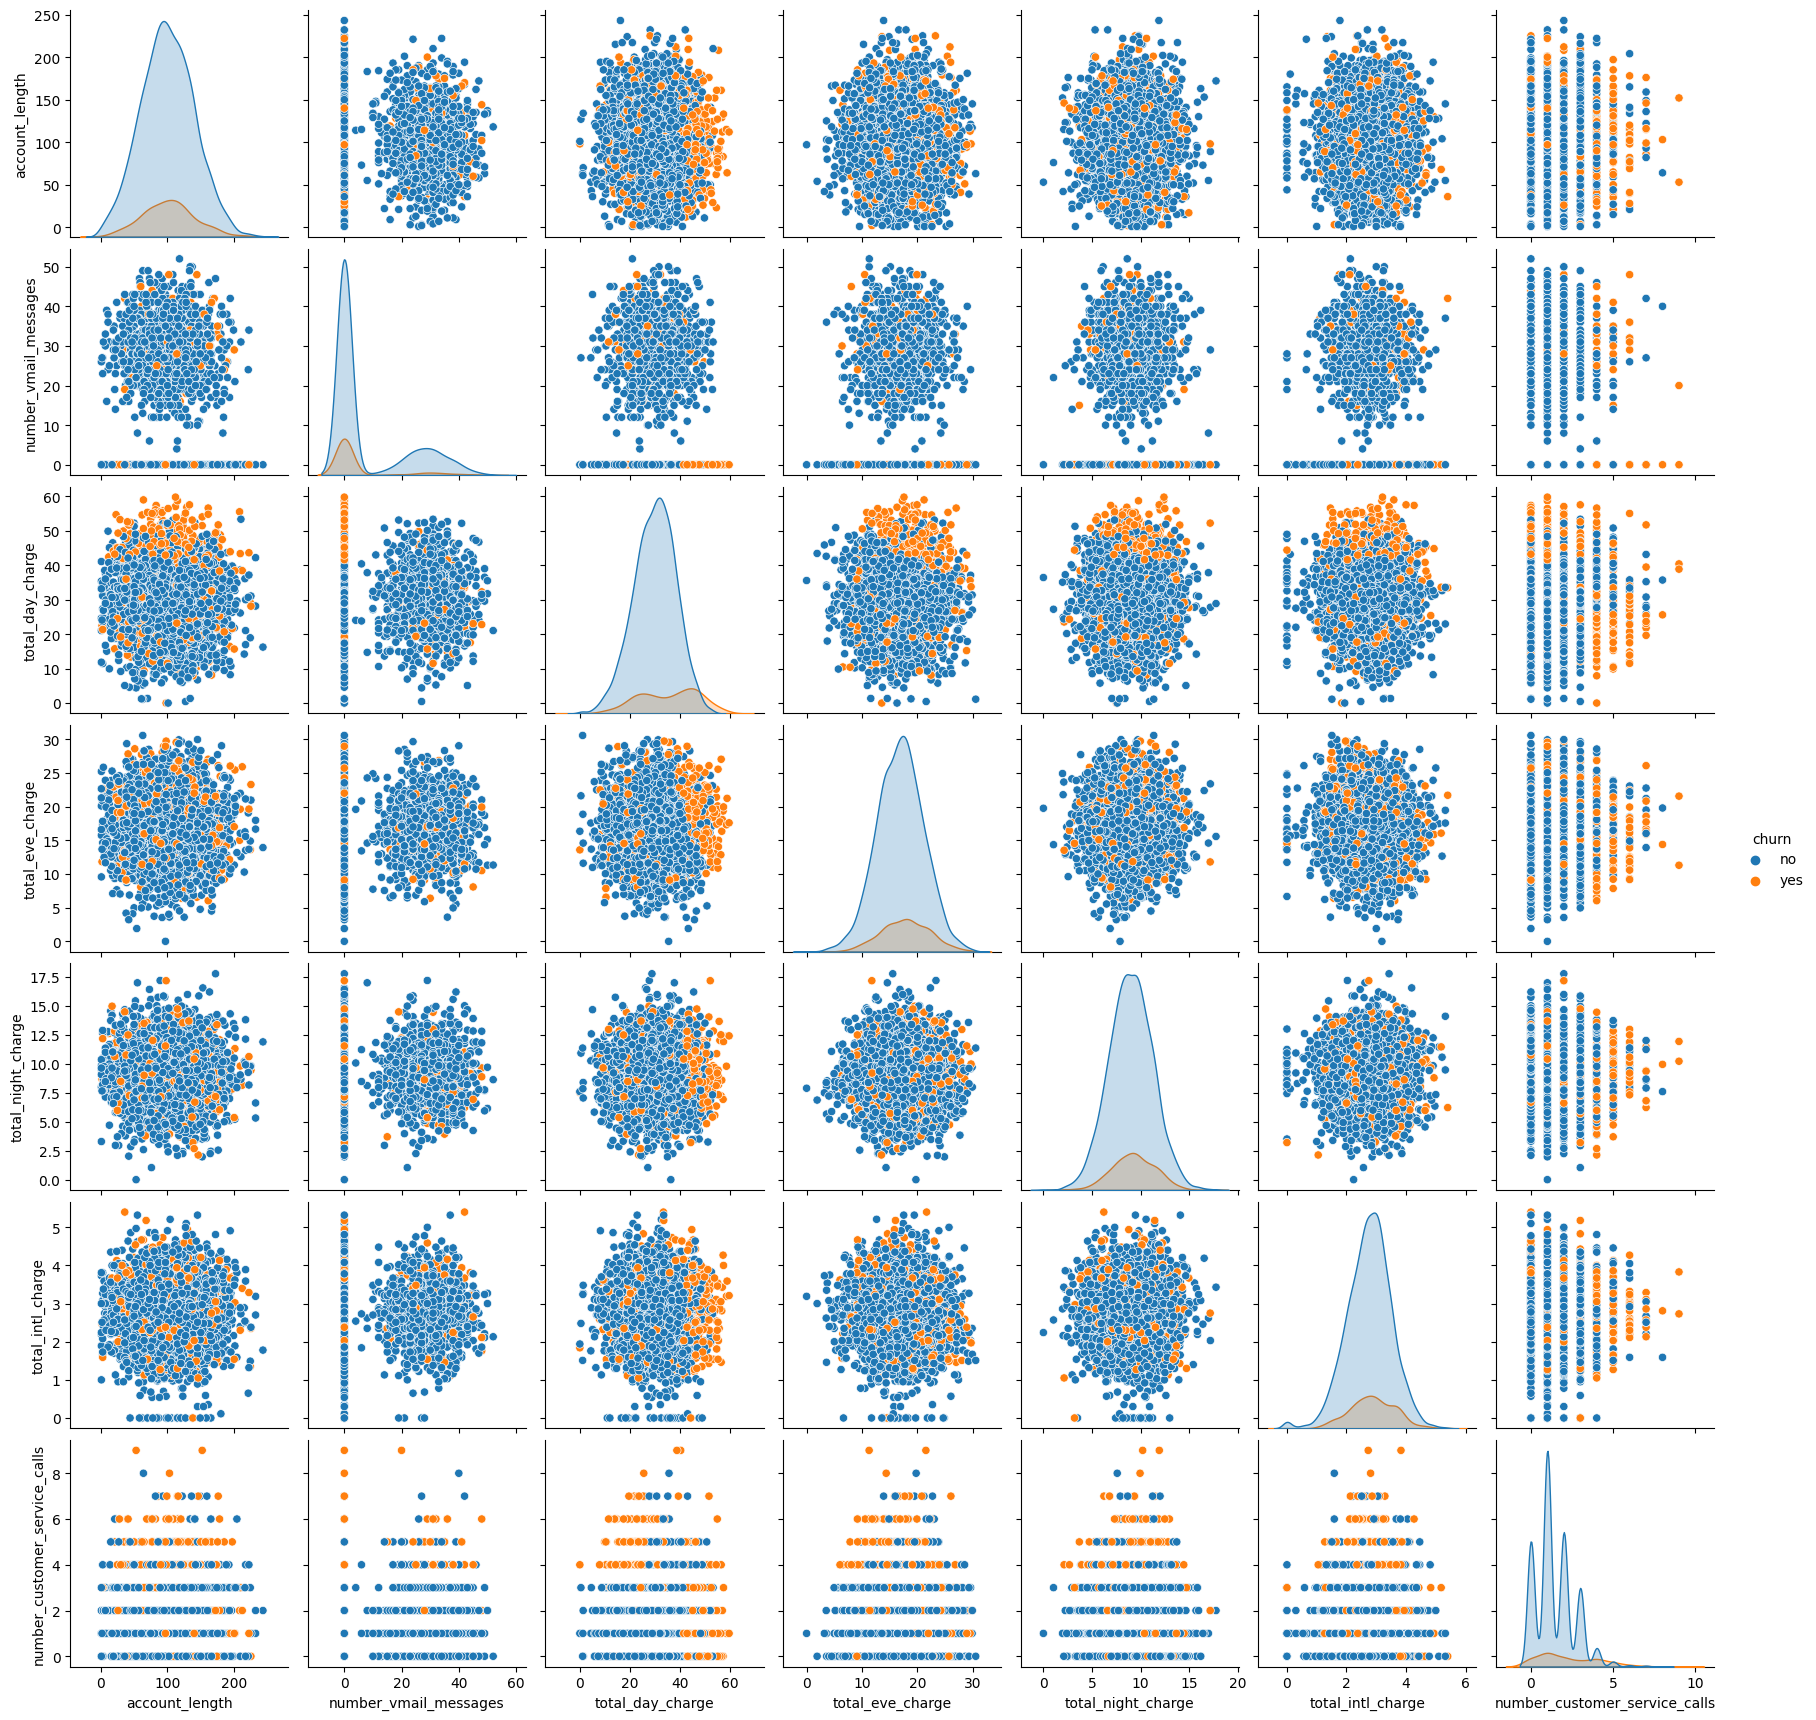

In [ ]:
sns.pairplot(train_data,vars=['account_length','number_vmail_messages', 'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_customer_service_calls'],hue='churn')

## Melihat Korelasi Antar Kolom

<Axes: >

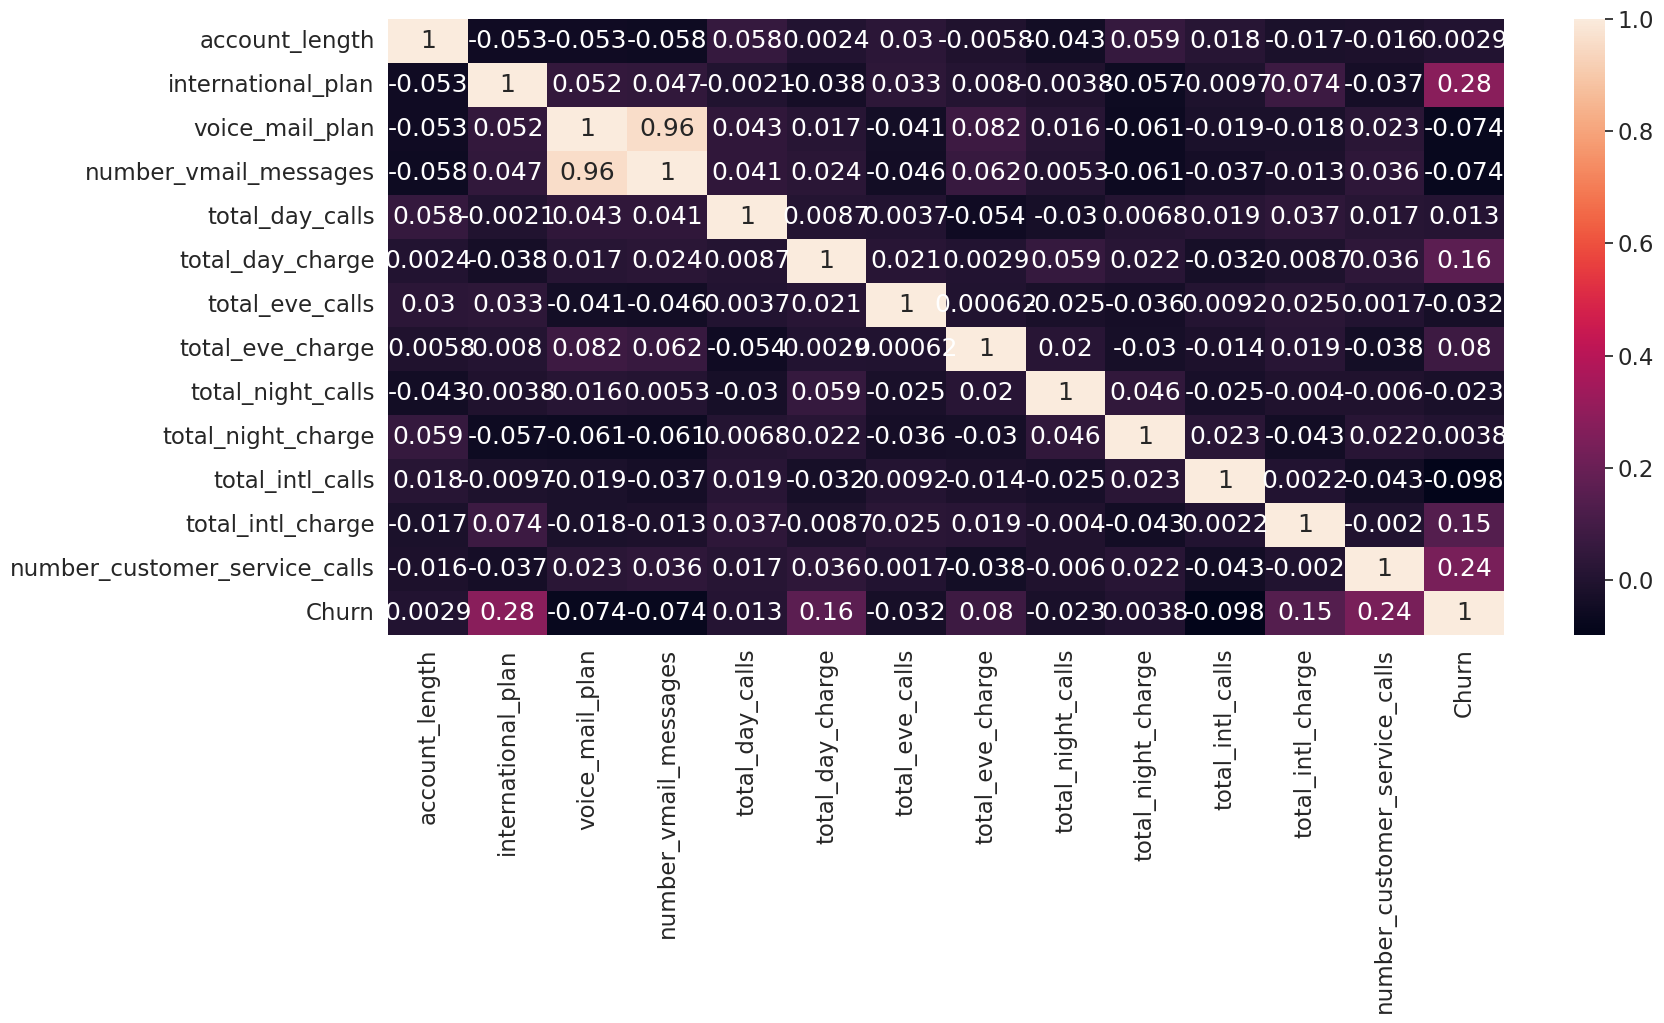

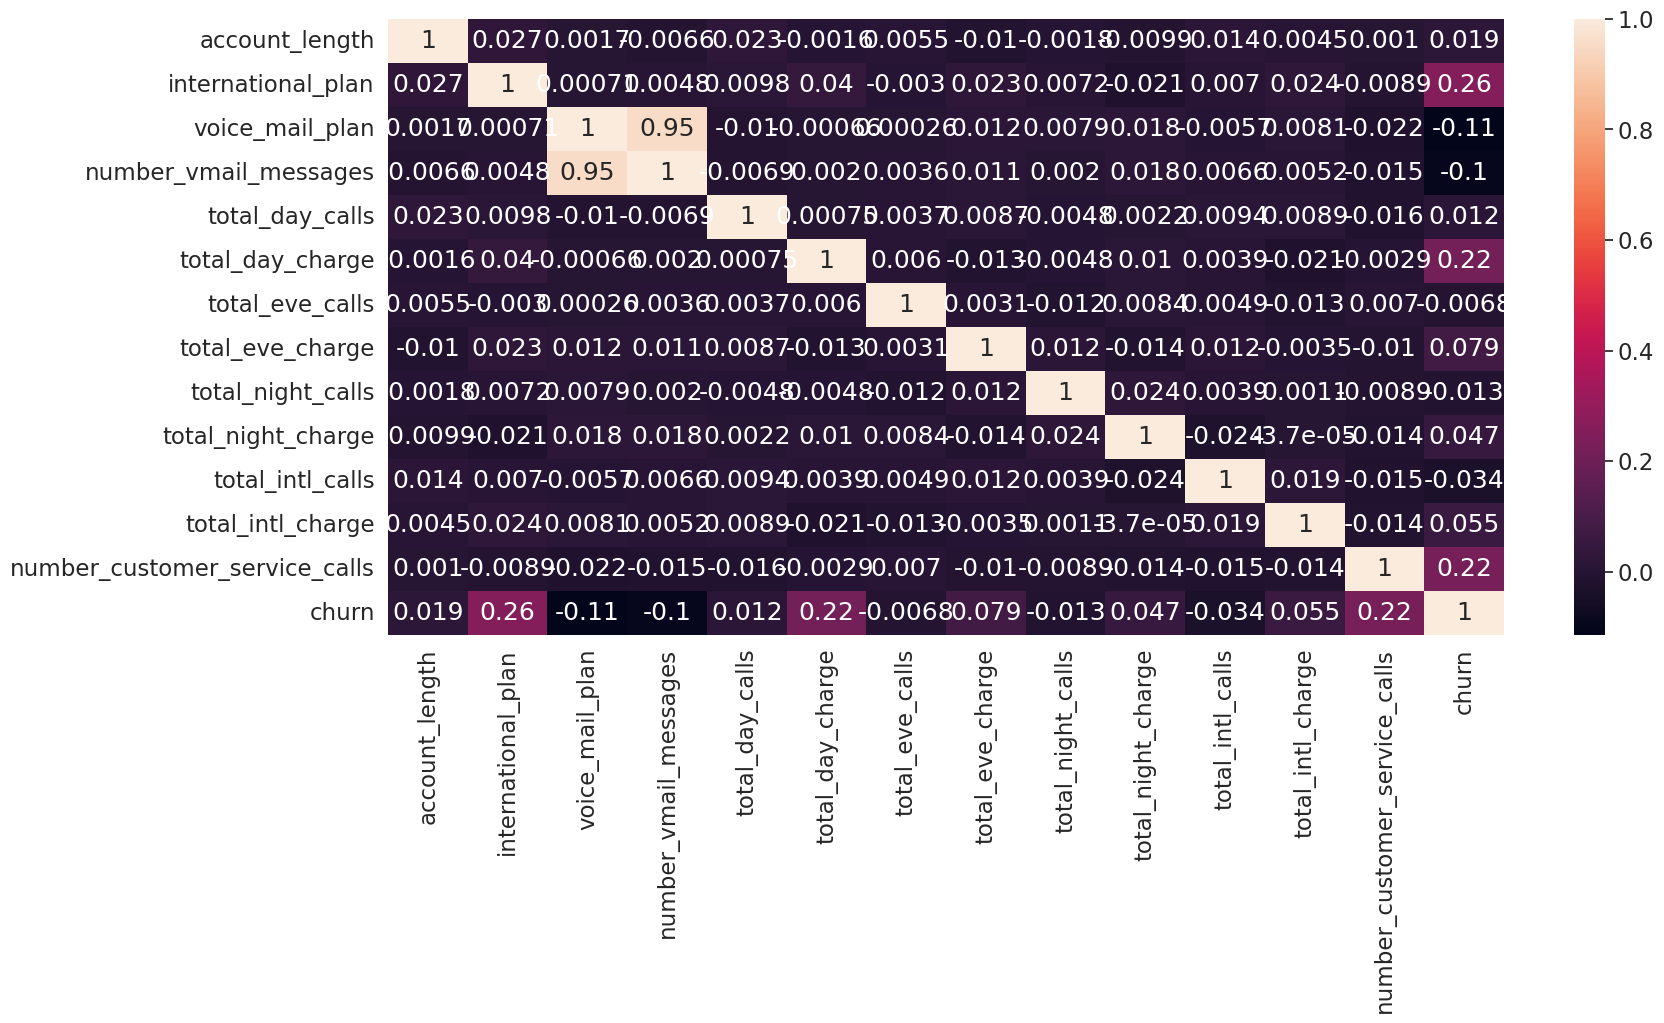

In [ ]:
# melihat korelasi antar kolom pada dataset test
plt.figure(figsize=(18,8))
sns.heatmap(test_data.corr(), annot=True)

# melihat korelasi antar kolom pada dataset train
plt.figure(figsize=(18,8))
sns.heatmap(train_data.corr(), annot=True)


<ipython-input-10-48005ab2bfee>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

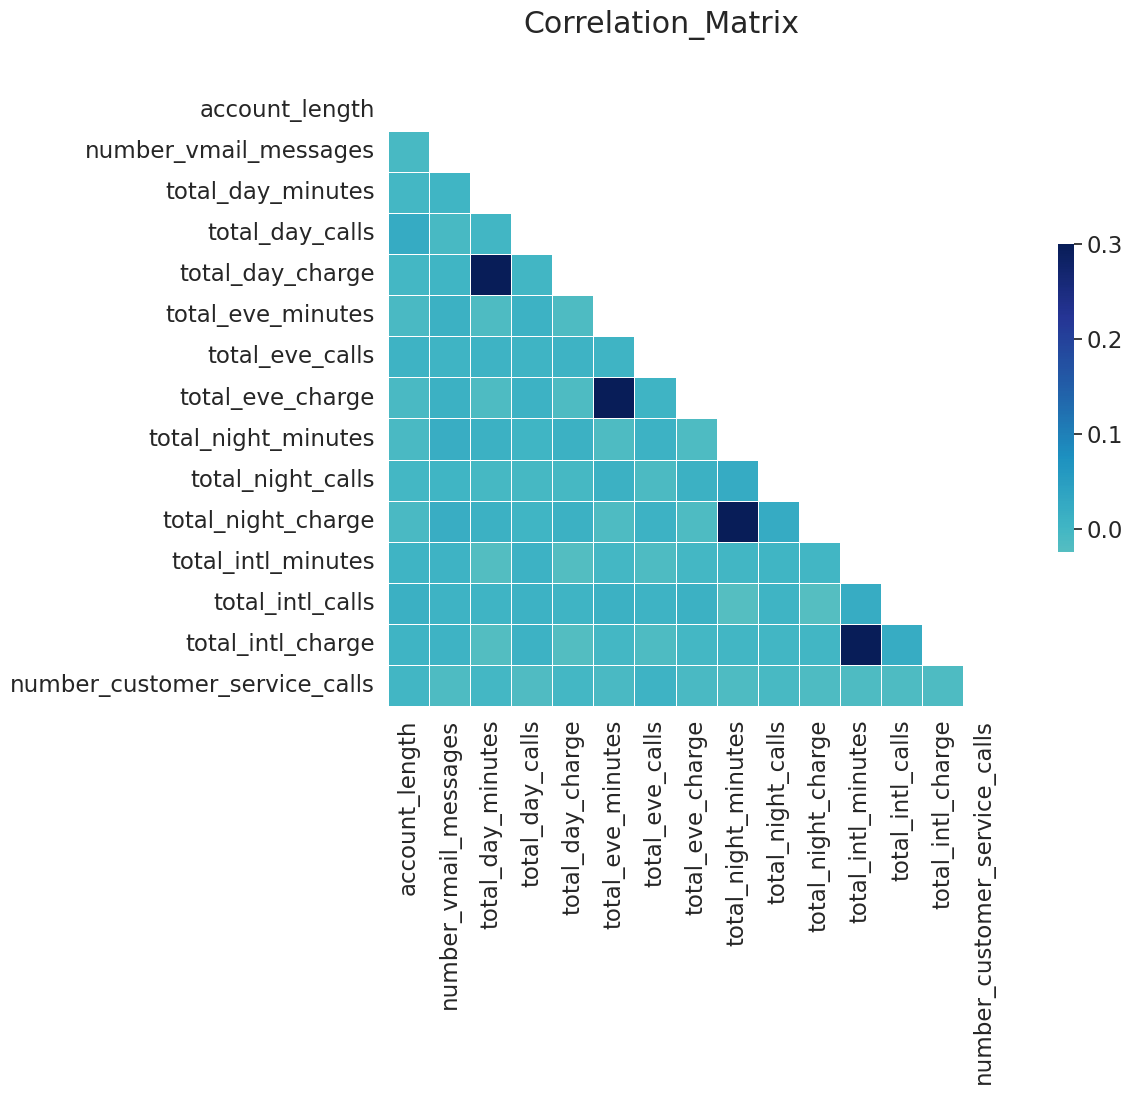

In [ ]:
sns.set(style="white", font_scale =1.5)
corr = train_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data Preprocesing


## Cek jumlah data yang hilang (missing values)

In [ ]:
print(test_data.isnull().sum())
print(train_data.isnull().sum())

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_d

## Menghapus Kolom yang Tidak Dibutuhkan

In [ ]:
# menghapus kolom yang tidak diperlukan pada dataset test
test_data.drop(['id'], axis=1, inplace=True)

# menghapus kolom yang tidak diperlukan pada dataset train
train_data.drop(['state', 'area_code'], axis=1, inplace=True)


In [ ]:
# Removing the highly correlated features
test_data = test_data.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)

train_data = train_data.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)

## Mengisi Data yang Hilang

In [ ]:
# mengisi data yang hilang pada dataset train dengan median
train_data.fillna(train_data.median(), inplace=True)


## Encoding Data Kategorikal

In [ ]:
# encoding data kategorikal pada dataset test
le = LabelEncoder()
test_data['international_plan'] = le.fit_transform(test_data['international_plan'])
test_data['voice_mail_plan'] = le.fit_transform(test_data['voice_mail_plan'])

# encoding data kategorikal pada dataset train
train_data['international_plan'] = le.fit_transform(train_data['international_plan'])
train_data['voice_mail_plan'] = le.fit_transform(train_data['voice_mail_plan'])
train_data['churn'] = le.fit_transform(train_data['churn'])


In [ ]:
# # Convert churn column to binary
# train_data['churn'] = train_data['churn'].apply(lambda x: 1 if x == 'yes' else 0)

# Modeling & Evaluation



## Mempersiapkan Data

In [ ]:
# memisahkan variabel independen dan dependen pada dataset train
X = train_data.drop(['churn'], axis=1)
y = train_data['churn']

# membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision Tree Classifier

In [ ]:
# import library Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# membuat model Decision Tree
dtc = DecisionTreeClassifier(random_state=42)

# fitting model dengan data train
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# prediksi data test
y_pred = dtc.predict(X_test)

# evaluasi model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[681  40]
 [ 36  93]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       721
           1       0.70      0.72      0.71       129

    accuracy                           0.91       850
   macro avg       0.82      0.83      0.83       850
weighted avg       0.91      0.91      0.91       850

0.9105882352941177


## Random Forest Classifier

In [ ]:
# import library Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# membuat model Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# fitting model dengan data train
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# prediksi data test
y_pred = rfc.predict(X_test)

# evaluasi model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[715   6]
 [ 34  95]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       721
           1       0.94      0.74      0.83       129

    accuracy                           0.95       850
   macro avg       0.95      0.86      0.90       850
weighted avg       0.95      0.95      0.95       850

0.9529411764705882


## Logistic Regression

In [ ]:
#import library Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#membuat model Logistic Regression
lr_model = LogisticRegression(max_iter = 2000, solver='lbfgs')

#fitting model dengan data train
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# Prediksi data test
y_pred_lr = lr_model.predict(X_test)

# Evaluasi model
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print('Logistic Regression Model Confusion Matrix:\n', lr_cm)
print('Logistic Regression Model Classification Report:\n', lr_report)
print('Logistic Regression Model Accuracy:', lr_accuracy)

Logistic Regression Model Confusion Matrix:
 [[703  18]
 [ 97  32]]
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       721
           1       0.64      0.25      0.36       129

    accuracy                           0.86       850
   macro avg       0.76      0.61      0.64       850
weighted avg       0.84      0.86      0.84       850

Logistic Regression Model Accuracy: 0.8647058823529412


## Support Vector Machine

In [ ]:
# membuat model Support Vector Machine
svm_model = SVC(random_state=42)

# fitting model dengan data train
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
#Support Vector Machine model evaluation
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print('Support Vector Machine Model Confusion Matrix:\n', svm_cm)
print('Support Vector Machine  Model Classification Report:\n', svm_report)
print('Support Vector Machine Model Accuracy:', svm_accuracy)

Support Vector Machine Model Confusion Matrix:
 [[721   0]
 [129   0]]
Support Vector Machine  Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.00      0.00      0.00       129

    accuracy                           0.85       850
   macro avg       0.42      0.50      0.46       850
weighted avg       0.72      0.85      0.78       850

Support Vector Machine Model Accuracy: 0.8482352941176471


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Prediction using Random Forest Model



In [ ]:
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,AL,118,area_code_510,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0
2,IA,62,area_code_415,0,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4
3,VT,93,area_code_510,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3
4,NE,174,area_code_415,0,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3


In [ ]:
#Drop unnecessary columns
test_data.drop(['state', 'area_code'], axis=1, inplace=True)

In [ ]:
#Label encoding for categorical features
test_data['international_plan'] = le.fit_transform(test_data['international_plan'])
test_data['voice_mail_plan'] = le.fit_transform(test_data['voice_mail_plan'])

In [ ]:
#Make churn prediction using random forest model
y_pred_churn = rfc.predict(test_data)
df_churn_pred = pd.DataFrame({'Churn Prediction': y_pred_churn})
df_churn_pred.value_counts()

Churn Prediction
0                   665
1                    85
dtype: int64

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
submission = pd.DataFrame({
        "Id": df_test["id"],
        "Churn": y_pred_churn
})

submission.head()

,Id,Churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:
submission.to_csv("churn_prediction.csv", index = False)

In [ ]:
test_data['Churn'] = submission['Churn']
test_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,118,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0
2,62,0,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4,1
3,93,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3,0
4,174,0,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3,0
